### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing the dataset

In [2]:
data =pd.read_csv("Complaints_Reviewed_As_Disinformation_clean.csv")

In [3]:
data.head(5)

,id,source_url,title,overview,outcome,status,platform,asset_urls,asset_text_extracts,created_at,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,773,https://tennesseestar.com/2020/09/21/mayor-joh...,American post questions Nashville Mayor's clos...,The post submitted for review asks whether or ...,The Mayor has not over-stated the COVID-19 cas...,Resolved,Other Website,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,774,NaN,Instant COVID-19 tests for sale,The complaint references a WhatsApp message th...,This information appears to be inaccurate and ...,in line with the South African National Instit...,treatment and advice. This message is therefor...,Resolved,WhatsApp,https://s3-eu-west-1.amazonaws.com/complaints-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,775,Dont let them lie to you! EVERY JOB and I rep...,False claims regarding Zimbabweans stealing jo...,The post uses unverified numbers to claim that...,Content circulated under the #PutSouthAfricaFi...,it does constitute disinformation. The matter ...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,777,NaN,Hyperbolic,untrue claims re. persecution of Boerevolk,An image and accompanying copy make a number o...,There are not 119 laws discriminating on groun...,unless discrimination is fair. The claims stat...,misinformation is used to exacerbate already-s...,while it should be clearly marked as misinform...,in the interests of freedom of expression,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,778,https://youtu.be/1Gbmm2vVyCE,Renaldo Gouws Youtuber making claims about Fai...,This prominent youtuber makes various false cl...,The initial reports were all shocking,which appears to be when this video was made,and later reports clarified that there had bee...,Resolved,Youtube,https://s3-eu-west-1.amazonaws.com/complaints-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning

In [4]:
#removing unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [5]:
data.columns

Index(['id', 'source_url', 'title', 'overview', 'outcome', 'status',
       'platform', 'asset_urls', 'asset_text_extracts', 'created_at'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   306 non-null    int64 
 1   source_url           223 non-null    object
 2   title                301 non-null    object
 3   overview             301 non-null    object
 4   outcome              301 non-null    object
 5   status               306 non-null    object
 6   platform             306 non-null    object
 7   asset_urls           305 non-null    object
 8   asset_text_extracts  303 non-null    object
 9   created_at           299 non-null    object
dtypes: int64(1), object(9)
memory usage: 24.0+ KB


In [7]:
data.source_url.count()

223

In [8]:
df=  data['source_url'].str.extract('(?<=http://)(.*?)(?=/)|(?<=https://)(.*?)(?=/)')

In [9]:
df = df[0].fillna(df[1]).fillna(data['source_url'])

In [10]:
data["media_source"] = df

In [11]:
data

,id,source_url,title,overview,outcome,status,platform,asset_urls,asset_text_extracts,created_at,media_source
0,773,https://tennesseestar.com/2020/09/21/mayor-joh...,American post questions Nashville Mayor's clos...,The post submitted for review asks whether or ...,The Mayor has not over-stated the COVID-19 cas...,Resolved,Other Website,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,tennesseestar.com
1,774,NaN,Instant COVID-19 tests for sale,The complaint references a WhatsApp message th...,This information appears to be inaccurate and ...,in line with the South African National Instit...,treatment and advice. This message is therefor...,Resolved,WhatsApp,https://s3-eu-west-1.amazonaws.com/complaints-...,NaN
2,775,Dont let them lie to you! EVERY JOB and I rep...,False claims regarding Zimbabweans stealing jo...,The post uses unverified numbers to claim that...,Content circulated under the #PutSouthAfricaFi...,it does constitute disinformation. The matter ...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,Dont let them lie to you! EVERY JOB and I rep...
3,777,NaN,Hyperbolic,untrue claims re. persecution of Boerevolk,An image and accompanying copy make a number o...,There are not 119 laws discriminating on groun...,unless discrimination is fair. The claims stat...,misinformation is used to exacerbate already-s...,while it should be clearly marked as misinform...,in the interests of freedom of expression,NaN
4,778,https://youtu.be/1Gbmm2vVyCE,Renaldo Gouws Youtuber making claims about Fai...,This prominent youtuber makes various false cl...,The initial reports were all shocking,which appears to be when this video was made,and later reports clarified that there had bee...,Resolved,Youtube,https://s3-eu-west-1.amazonaws.com/complaints-...,youtu.be
...,...,...,...,...,...,...,...,...,...,...,...
301,1642,https://m.facebook.com/story.php?story_fbid=10...,Facebook: deaths due to vaccines,Complaint is that this Facebook story constitu...,This complaint is of a Facebook story,that has now disappeared. Even though it is no...,it still constitutes mis- or disinformation. I...,Resolved,Facebook,https://s3-eu-west-1.amazonaws.com/complaints-...,m.facebook.com
302,1655,https://emlct.com/index.php/covid-19-pandemic-...,False information about Covid-19 vaccines and ...,The article contains false information about t...,the Covid-19 vaccine and PCR tests.,The publication constitutes mis- or disinforma...,for example,false that the 'mRNA “vaccines” in current use...,nor how effective they may be ' It is also fa...,the false information in the publication could...,emlct.com
303,1664,NaN,Whatsapp: advert for Covid Kits,Complaint is that this advert,being spread via Whatsapp,contains false and misleading information rega...,This advertisement,being spread via Whatsapp,contains false and misleading information rega...,this constitutes mis- or disinformation. It sh...,NaN
304,1682,https://twitter.com/sabza1_za/status/142945263...,False claims about COVID-19 vaccines,The Tweet endorses and re-publishes false clai...,The Tweet constitutes mis- or disinformation. ...,the false information published in the Tweet a...,increase the transmission of SARS-CoV-2,and cause severe public harm.,Resolved,Twitter,twitter.com


In [12]:
data_twitter = data.loc[data['media_source']=='twitter.com']

In [13]:
data_twitter.count()

id                     131
source_url             131
title                  131
overview               131
outcome                131
status                 131
platform               131
asset_urls             131
asset_text_extracts    131
created_at             129
media_source           131
dtype: int64

In [14]:
data_twitter

,id,source_url,title,overview,outcome,status,platform,asset_urls,asset_text_extracts,created_at,media_source
6,782,https://twitter.com/twatterbaas/status/1308422...,Contrasting images used to further racist agenda,The tweet juxtaposes two images purporting to ...,While the nature and message of the posts seek...,white superiority agenda using isolated images...,it does not constitute hate speech as the inci...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,twitter.com
7,785,https://twitter.com/dirkdup69/status/130880063...,Racist Tweets by @dirkdup69,This Twitter user posts the most vile hate spe...,These posts contain strong elements of both di...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,twitter.com
10,816,https://twitter.com/MKasukude/status/131044134...,All Nigerians are Criminals and must go,This tweet is a hateful tweet that incites vio...,While the sentiments conveyed in the reported ...,the tweet itself does not meet the criteria fo...,does constitute disinformation.,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,twitter.com
13,829,https://twitter.com/FihliF/status/131179928816...,Disinformation with xenophobic agenda re. Oran...,The tweet purports to depict the woman who all...,While the picture has been confirmed as not de...,news reports confirm that the person accused o...,the overall effect of the wording is to incite...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,twitter.com
14,847,https://twitter.com/Carl34409784/status/131405...,Tweet indicating that masks are a farce and sh...,This complaint pertains to a tweet in which th...,Typical misinformation around the wearing of m...,while reducing transmissions of the virus betw...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,twitter.com
...,...,...,...,...,...,...,...,...,...,...,...
288,1577,https://twitter.com/unathi_kwaza/status/141805...,Twitter: 28 deaths from vaccine in SA so far,Complaint is that this tweet contains misleadi...,This tweet has been worded in a misleading man...,not from the vaccination itself. This could po...,however,it should still be sent to Twitter. An infogra...,Resolved,Twitter,twitter.com
290,1581,https://twitter.com/advovolicious/status/14185...,Twitter: Do not get vaccinated...you will die ...,Complaint is that this tweet contains false an...,This tweet contains false and misleading infor...,which could potentially cause public harm in t...,an infographic should be issued as well as a t...,Resolved,Twitter,NaN,twitter.com
292,1592,https://twitter.com/Richard_Spoor/status/14200...,Tweet claims that new COVID-19 strains more li...,Complainant states: Richard Spoor makes unfoun...,This statement has been refuted and is thus mi...,when a virus is spreading widely in a populati...,it is more likely to mutate. 'The more opportu...,the more it replicates – and the more opportun...,” the WHO says. Source: https://www.reuters....,Resolved,twitter.com
295,1606,https://twitter.com/advovolicious/status/14186...,Twitter: Do not get vaccinated...or else you w...,Complaint is that this tweet contains false an...,This tweet contains false and misleading infor...,this tweet constitutes mis- or disinformation....,this does not constitute hate speech. This sho...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,twitter.com


In [15]:
data["media_source"].isna()

0      False
1       True
2      False
3       True
4      False
       ...  
301    False
302    False
303     True
304    False
305    False
Name: media_source, Length: 306, dtype: bool

In [16]:
#removing whataspp texts
# Whatsapp text would have no source url, so we can ignore anything empty in the source_urls
source_url = []
for index, row in data.iterrows():
    if pd.isnull(row.media_source)==True:
            source = "whatsapp"
    elif row.media_source== 'twitter.com':
        source = "twitter"
    elif  row.media_source== 'm.facebook.com':
        source = "facebook"
    elif row.media_source== 'youtu.be':
        source = "youtube"
        
    else:
        source = "Other"
    source_url.append(source)
data["media_cat"]= source_url

In [17]:
from collections import Counter

In [18]:
Counter(list(data.media_cat))

Counter({'Other': 76,
         'whatsapp': 83,
         'youtube': 5,
         'twitter': 131,
         'facebook': 11})

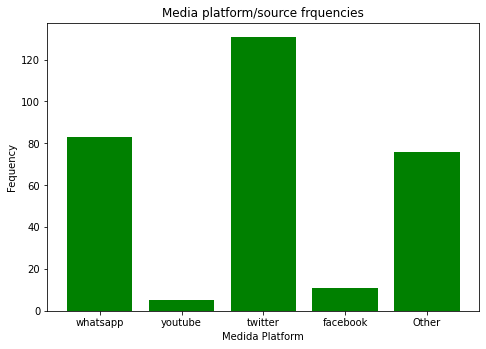

In [19]:
# labels for bars
tick_label = ['whatsapp', 'youtube', 'twitter', 'facebook', 'Other']
label_counts = [83, 5, 131, 11, 76]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Media platform/source frquencies')
ax.set_ylabel('Fequency')
ax.set_xlabel("Medida Platform")
ax.bar(tick_label,label_counts, color='g' )
plt.show()

In [20]:
data = data.loc[data['media_cat'] !='whatsapp']

In [21]:
data.to_csv("Complaints_Reviewed_As_Disinformation_cleaned", index=False, encoding='utf-8-sig')

In [22]:
data.to_excel("Complaints_Reviewed_As_Disinformation_cleaned.xlsx", index=False, encoding='utf-8-sig')

In [23]:
pd.read_excel("Complaints_Reviewed_As_Disinformation_cleaned.xlsx")

,id,source_url,title,overview,outcome,status,platform,asset_urls,asset_text_extracts,created_at,media_source,media_cat
0,773,https://tennesseestar.com/2020/09/21/mayor-joh...,American post questions Nashville Mayor's clos...,The post submitted for review asks whether or ...,The Mayor has not over-stated the COVID-19 cas...,Resolved,Other Website,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,tennesseestar.com,Other
1,775,Dont let them lie to you! EVERY JOB and I rep...,False claims regarding Zimbabweans stealing jo...,The post uses unverified numbers to claim that...,Content circulated under the #PutSouthAfricaFi...,it does constitute disinformation. The matter ...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,https://s3-eu-west-1.amazonaws.com/complaints-...,Dont let them lie to you! EVERY JOB and I rep...,Other
2,778,https://youtu.be/1Gbmm2vVyCE,Renaldo Gouws Youtuber making claims about Fai...,This prominent youtuber makes various false cl...,The initial reports were all shocking,which appears to be when this video was made,and later reports clarified that there had bee...,Resolved,Youtube,https://s3-eu-west-1.amazonaws.com/complaints-...,youtu.be,youtube
3,780,Nigerians at Pretoria this morning getting rea...,Old video uses trending xenophobic and traffic...,The video featured in the tweet submitted for ...,and states isa [sic] war.,This is disinformation for private gain. 0 O ...,VOLTE 4G.al 3G.ill A 0 O 0123% Js 09:18 Tweet ...,VOLTE 4G.al 3G.ill A 0 O 0123% Js 09:18 Tweet ...,2020-09-23 7:19:41,NaN,t.co,Other
4,782,https://twitter.com/twatterbaas/status/1308422...,Contrasting images used to further racist agenda,The tweet juxtaposes two images purporting to ...,While the nature and message of the posts seek...,white superiority agenda using isolated images...,it does not constitute hate speech as the inci...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,twitter.com,twitter
...,...,...,...,...,...,...,...,...,...,...,...,...
218,1614,https://www.facebook.com/567567226/posts/10158...,Mis- or disinformation about vaccination incre...,The publication falsely and misleadingly claim...,The publication constitutes mis- or disinforma...,promote low rates of vaccine acceptance,and undermine public trust in science.,Resolved,Facebook,NaN,www.facebook.com,Other
219,1642,https://m.facebook.com/story.php?story_fbid=10...,Facebook: deaths due to vaccines,Complaint is that this Facebook story constitu...,This complaint is of a Facebook story,that has now disappeared. Even though it is no...,it still constitutes mis- or disinformation. I...,Resolved,Facebook,https://s3-eu-west-1.amazonaws.com/complaints-...,m.facebook.com,facebook
220,1655,https://emlct.com/index.php/covid-19-pandemic-...,False information about Covid-19 vaccines and ...,The article contains false information about t...,the Covid-19 vaccine and PCR tests.,The publication constitutes mis- or disinforma...,for example,false that the 'mRNA “vaccines” in current use...,nor how effective they may be ' It is also fa...,the false information in the publication could...,emlct.com,Other
221,1682,https://twitter.com/sabza1_za/status/142945263...,False claims about COVID-19 vaccines,The Tweet endorses and re-publishes false clai...,The Tweet constitutes mis- or disinformation. ...,the false information published in the Tweet a...,increase the transmission of SARS-CoV-2,and cause severe public harm.,Resolved,Twitter,twitter.com,twitter


In [24]:
data_twitter = data.loc[data['media_cat'] =='twitter']

In [25]:
data_twitter.to_excel("Complaints_Reviewed_As_Disinformation_twitter.xlsx", index=False, encoding='utf-8-sig')

### Tokenization

In [26]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import string

In [27]:
documents = data_twitter.title

In [28]:
documents.to_csv("MMA_Data.csv")

In [29]:
vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(documents)
X_dtm_tfidf = vectorizer_tfidf.transform(documents)
tfidf_feature_names = vectorizer_tfidf.get_feature_names()

C:\Users\Mohlatlego\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:

# Helper function to print 
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        cloud_text = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
# Helper function to visualize the topics/themes
def wordcloud_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        cloud_text = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        # Create the wordcloud object
        wordcloud = WordCloud(width=480, height=480, margin=0,background_color = 'white').generate(cloud_text)
        fig1, ax1 = plt.subplots()
        # Display the generated image:
        ax1.imshow(wordcloud, interpolation='bilinear')
        ax1.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title("Topic %s" % topic_idx,fontsize = 12)

In [31]:
def fit_LDA(X, n_components):
    # YOUR CODE HERE
    lda = LatentDirichletAllocation(n_components=n_components, random_state=0)
    lda_tfidf =lda.fit(X)
    return lda_tfidf

In [32]:
# Lets start first by assuming we have 4 underlying topics. We can change this later. 
n_components = 20
num_top_words= 20
lda_tfidf = fit_LDA(X_dtm_tfidf, n_components)
X_lda_tfidf_membership = lda_tfidf.transform(X_dtm_tfidf)

print_top_words(lda_tfidf, tfidf_feature_names, num_top_words)

Topic #0: the that claiming of responsible in regarding south and africa on for musk renaldo gouws elon attempt at features satire
Topic #1: from compulsory public wearing mmr creation involving strategic abortions recent us 2017 masks not protests image vaccine be alleged is
Topic #2: for diseases cure all mahathir mohamed retweet and alleged cabanac roman teachingon stating 99 papers relieve artemisia symptoms ad tea
Topic #3: of cuban by the nick hudson tweet cia wearing theories conspiracy mynameisjerm responds jonathan accusation bullying witt tshwaku ostensibly mgcini
Topic #4: tweet sars cov is scam launching steaming ancyl campaign virus extreme phoenix alleged holomisa galela bantu preventative violence about claiming
Topic #5: klipklop12 outrightly spread implemented denying control measures of efficacy 19 covid to tweet twitter that in and re the vaccine
Topic #6: efficacy or big tweet minister health parasites calling twitter foreigners putsouthafricansfirst mis scam zweli 

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Mohlatlego\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['source']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


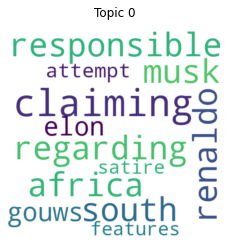

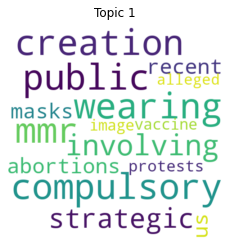

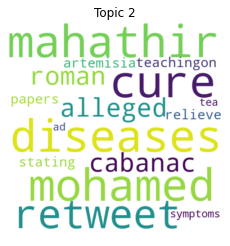

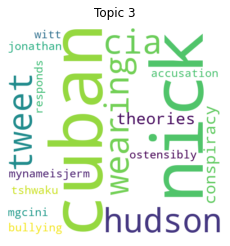

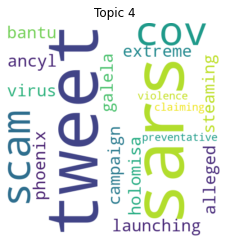

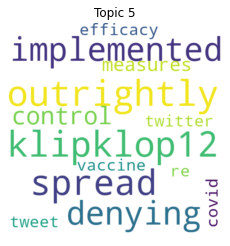

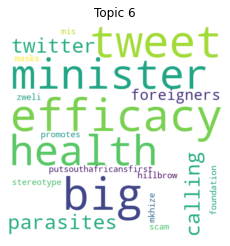

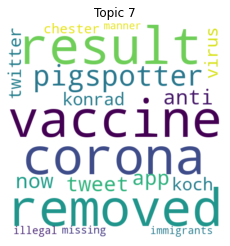

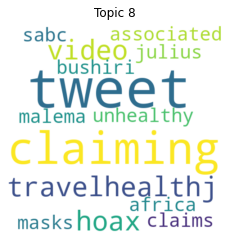

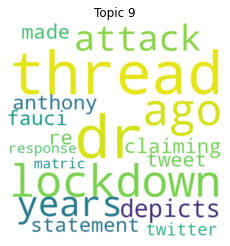

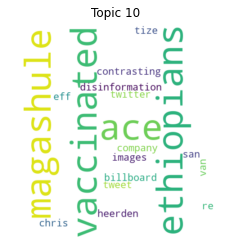

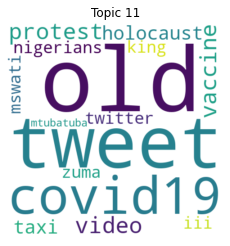

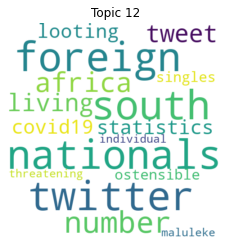

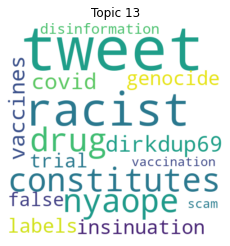

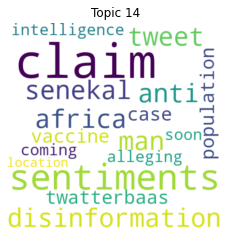

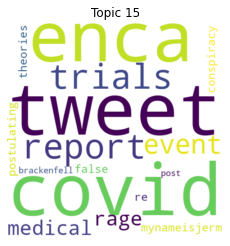

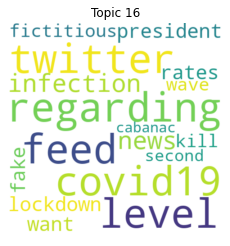

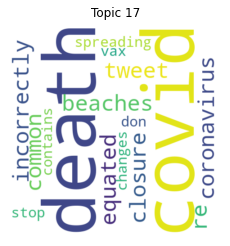

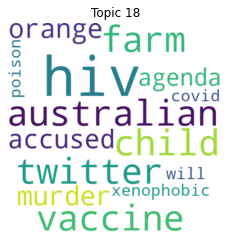

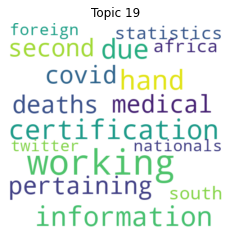

In [35]:
figsize(3,3)
wordcloud_top_words(lda_tfidf, tfidf_feature_names, num_top_words)